In [39]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm

In [2]:
data = pd.read_csv("winequality-white.csv", sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

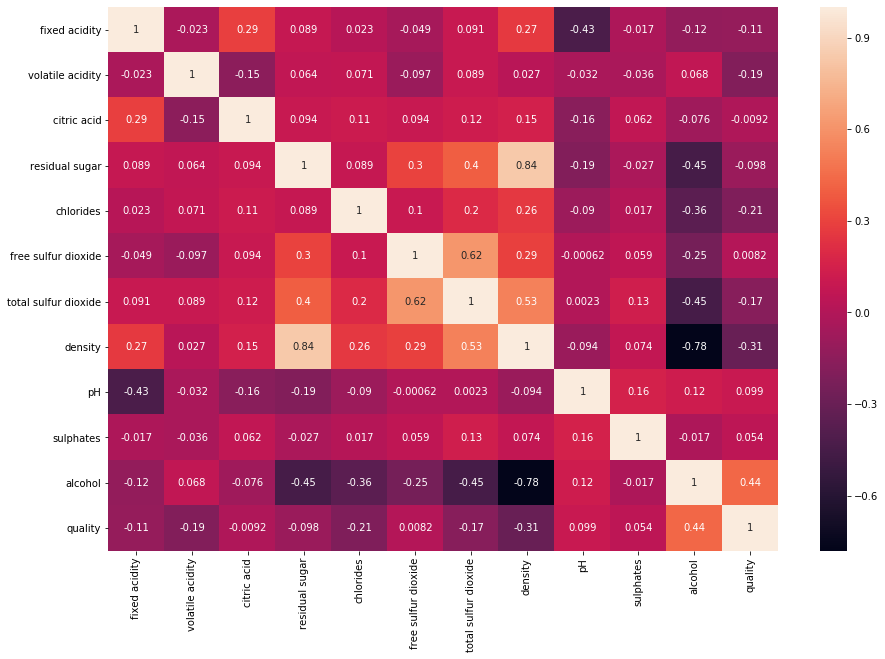

In [4]:
corr = data.corr()
plt.figure(figsize = (15,10))
sn.heatmap(corr, annot = True)

In [5]:
quality = data['quality'].values
category = []
for i in quality:
    if i < 5:
        category.append("Bad")
    elif i > 6:
        category.append("Good")
    else:
        category.append("Mid")

In [8]:
category = pd.DataFrame(data=category, columns = ['Category'])
data = pd.concat([data, category], axis = 1)
data.drop(['quality'], axis = 1, inplace = True)

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Mid
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Mid
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Mid
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Mid
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Mid


In [11]:
data['Category'].value_counts()

Mid     3655
Good    1060
Bad      183
Name: Category, dtype: int64

In [18]:
data[['Category','alcohol']].groupby("Category").mean().sort_values(by = 'alcohol',ascending = False)

,alcohol
Category,
Good,11.416022
Mid,10.269808
Bad,10.173497


In [26]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [33]:
LE =LabelEncoder()
y = LE.fit_transform(y)

In [34]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y)

In [35]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [63]:
rfc = RandomForestClassifier()
rfc.fit(xTrain,yTrain)
pred = rfc.predict(xTest)

C:\Users\Haris Ali\Anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
acc = rfc.score(xTrain,yTrain)
acc

0.9904710046283692